## Introduction

Explored different scaling methods along with that implemented different research papers for non image data to image conversion.

## Description

For scaling/normalization techniques, we explored linear and non linear methods. Since our data have outliers, it seems MinMax scaling tends to suppress majority of the data to small values whereas in case of sigmoid majority of the data was converted to around 0.5.

Secondly, I implemented 2 research papers.
>- DeepInsight: The methodology behind this was to use PCA/kPCA/TSNE to position features into an image. Features with close corelation will be mapped close as compare to others. If features were too close, they would map onto each other and would be averaged out.

>- Second research paper used 3 techniques
>>- Equidistant graph bars: Simply plotted normalized histogram and created an image out of it. Since this paper was using MinMax scaling, graph doesnt seem to vary much for fraud and non fraud.
>>- Normalized distance matrix: Created a matrix based on normalized euclidean distance.
>>- Combined method: In this, they simply combined both techniques.


## Normalization techniques

#### Linear
> - MinMax Scaler : Due to outliers, it supresses small values
#### NonLinear 
> - Log Scaler : Take cares of small and large values but uses abs for negative values
> - Sigmoid : We still need to know gradient and mid value of x-axis.


In [23]:
from pyDeepInsight import ImageTransformer, LogScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,MinMaxScaler,RobustScaler
import pandas as pd
import numpy as np
import cv2
import glob

from matplotlib import pyplot as plt
import seaborn as sns

In [4]:
def is_outlier(points, thresh=3.5):
    points = np.array(points)
    if len(points.shape) == 1:
        points = points[:,None]
    median = np.median(points, axis=0)
    diff = np.sum((points - median)**2, axis=-1)
    diff = np.sqrt(diff)
    med_abs_deviation = np.median(diff)

    modified_z_score = 0.6745 * diff / med_abs_deviation

    return modified_z_score > thresh

In [169]:
import math

class SigmoidScaler:
    def fit_transform(self,x):
        return 1 / (1 +  np.exp(-x))

In [75]:
df = pd.read_csv('Dataset/uni_ratios_fraud.csv',sep = ';')
df.head()

,g_id,fyear,gvkey,fraud,sale_flag,at_flag,sale/at,at/sale,act/sale,act/at,...,rect/sale,rect/at,sstk/sale,sstk/at,txp/sale,txp/at,txt/sale,txt/at,xint/sale,xint/at
0,100001990,1990.0,10000.0,0.0,0,0,1.203083,0.831198,0.631982,0.760326,...,0.159846,0.192308,0.000024,0.000028,0.001105,0.001329,0.003804,0.004577,0.037299,0.044873
1,100001991,1991.0,10000.0,0.0,0,0,1.361683,0.734385,0.545042,0.742175,...,0.146434,0.199397,0.000037,0.000051,0.000922,0.001255,0.002201,0.002997,0.032109,0.043722
2,100001992,1992.0,10000.0,0.0,0,0,1.428408,0.700080,0.495408,0.707644,...,0.156451,0.223476,0.000037,0.000053,0.003290,0.004700,0.003626,0.005180,0.023040,0.032910
3,100001993,1993.0,10000.0,0.0,0,0,1.376801,0.726321,0.521222,0.717620,...,0.167717,0.230913,0.008726,0.012014,0.007921,0.010906,0.014081,0.019386,0.021179,0.029159
4,100001994,1994.0,10000.0,0.0,0,0,1.365206,0.732490,0.524201,0.715642,...,0.182585,0.249266,0.000840,0.001146,0.000000,0.000000,0.018308,0.024994,0.019176,0.026179


In [76]:
df.describe()

,g_id,fyear,gvkey,fraud,sale_flag,at_flag,sale/at,at/sale,act/sale,act/at,...,rect/sale,rect/at,sstk/sale,sstk/at,txp/sale,txp/at,txt/sale,txt/at,xint/sale,xint/at
count,1.460450e+05,146045.000000,146045.000000,146045.000000,146045.000000,146045.000000,146045.000000,146045.000000,146045.000000,146045.000000,...,146045.000000,146045.000000,146045.000000,146045.000000,146045.000000,146045.000000,146045.000000,146045.000000,146045.000000,146045.000000
mean,5.424364e+08,2002.011702,54243.435516,0.006601,0.071225,0.004047,2.834339,16.423917,7.483634,0.495074,...,0.433393,0.150481,5.437247,0.241497,0.073672,0.006898,-0.019277,0.014842,0.705279,0.264401
std,5.993746e+08,6.959894,59937.455765,0.080976,0.257201,0.063485,47.186967,330.139351,222.627523,0.273108,...,11.264734,0.137669,168.909065,5.241214,9.490696,0.164446,10.789259,0.522142,27.866052,18.557445
min,1.004199e+07,1990.000000,1004.000000,0.000000,0.000000,0.000000,-11.538462,-1990.120000,-333.263158,-0.666667,...,-142.400000,-0.243243,-562.631579,-0.172085,-16.777778,-0.021008,-2857.375000,-36.000000,-47.603448,-0.286667
25%,1.065820e+08,1996.000000,10658.000000,0.000000,0.000000,0.000000,0.423298,0.680021,0.285714,0.266761,...,0.085818,0.043956,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.003179,0.002902
50%,2.508820e+08,2002.000000,25088.000000,0.000000,0.000000,0.000000,0.888315,1.124941,0.451608,0.494892,...,0.150417,0.119544,0.004559,0.004269,0.000000,0.000000,0.005268,0.004720,0.014811,0.013998
75%,6.658620e+08,2008.000000,66586.000000,0.000000,0.000000,0.000000,1.469601,2.359249,0.827804,0.717052,...,0.221603,0.218024,0.078916,0.052289,0.006241,0.005822,0.029825,0.027651,0.044776,0.031132
max,3.172642e+09,2014.000000,317264.000000,1.000000,1.000000,1.000000,13203.000000,60268.000000,55955.000000,1.096045,...,2506.500000,1.000000,38934.000000,792.000000,2647.000000,61.000000,1946.500000,178.000000,6387.000000,6584.500000


In [158]:
# function to plot histogram
def plot_hist(df,col,scaler = None,ax = None,bins = 50,dev = 3.5):
    X = df[[col]]
    if scaler is not None:
        X = scaler.fit_transform(X)
    filtered = pd.DataFrame(X[~is_outlier(X,dev)])
    if ax is not None:
        filtered.plot(kind = 'hist',bins = bins,ax = ax)
    else: 
        filtered.plot(kind = 'hist',bins = bins)

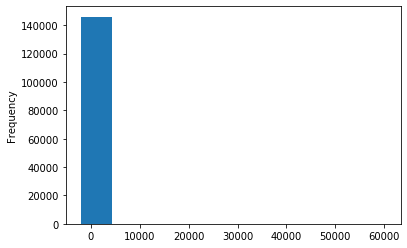

In [159]:
df['at/sale'].plot(kind = 'hist')

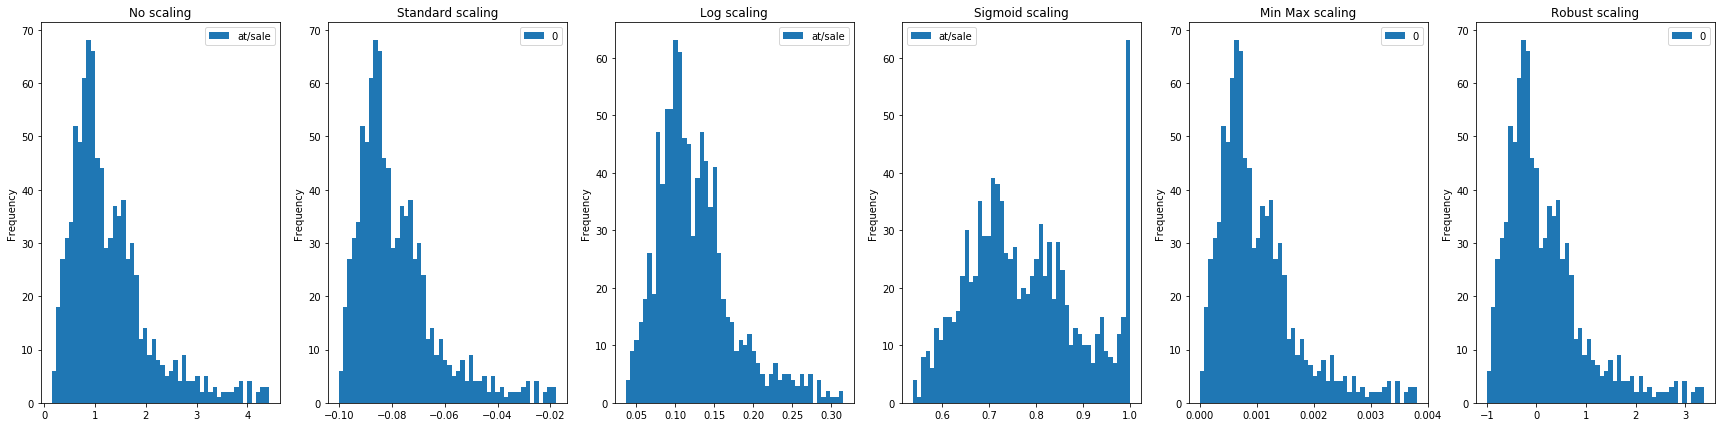

In [173]:
titles = ['No scaling','Standard scaling','Log scaling','Sigmoid scaling','Min Max scaling','Robust scaling']
scales = [None,StandardScaler(),LogScaler(),SigmoidScaler(),MinMaxScaler(),RobustScaler()]
fig, ax = plt.subplots(1, len(scales), figsize=(30, 7))

for i in range(len(scales)):
    ax[i].set_title(titles[i])
    plot_hist(df[df.fraud == 1],'at/sale',scales[i],ax[i],dev = 5)

C:\Users\umaid\anaconda3\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: overflow encountered in exp
  """


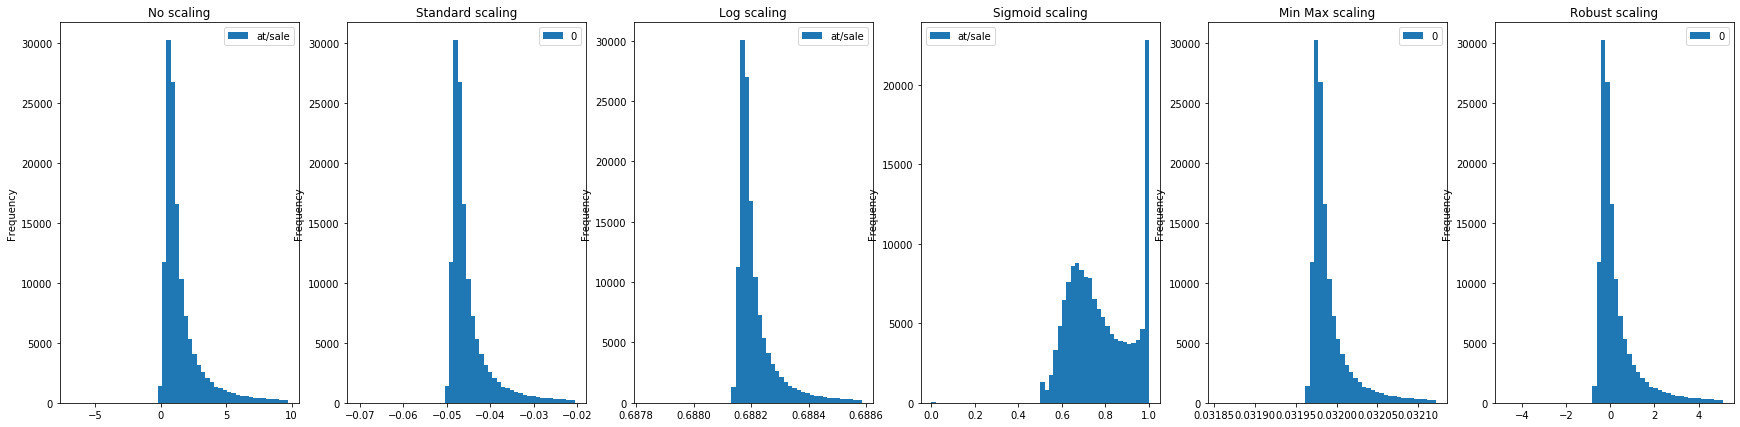

In [174]:
titles = ['No scaling','Standard scaling','Log scaling','Sigmoid scaling','Min Max scaling','Robust scaling']
scales = [None,StandardScaler(),LogScaler(),SigmoidScaler(),MinMaxScaler(),RobustScaler()]
fig, ax = plt.subplots(1, len(scales), figsize=(30, 7))

for i in range(len(scales)):
    ax[i].set_title(titles[i])
    plot_hist(df[df.fraud == 0],'at/sale',scales[i],ax[i],dev = 10)

In [11]:
def plot_hist_varnorm(df,col,scaler = None,ax = None,bins = 50,dev = 3.5):
    X = df[[col]]
    if scaler is not None:
        X = StandardScaler().fit_transform(X)
        X = scaler.fit_transform(X)
    filtered = pd.DataFrame(X[~is_outlier(X,dev)])
    if ax is not None:
        filtered.plot(kind = 'hist',bins = bins,ax = ax)
    else: 
        filtered.plot(kind = 'hist',bins = bins)

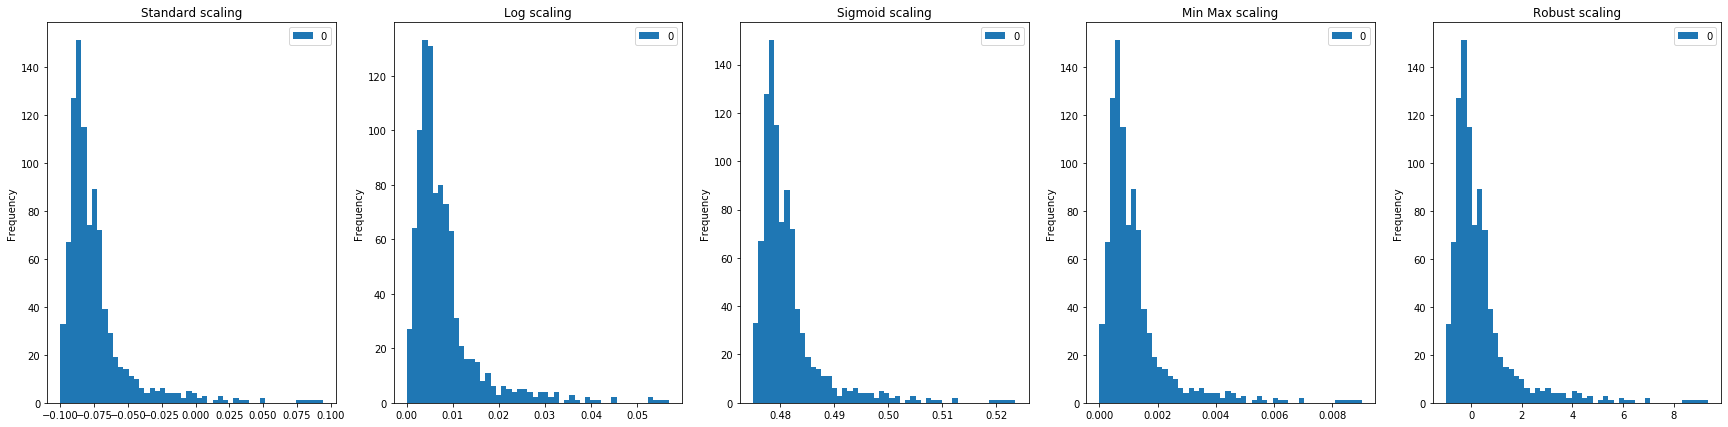

In [180]:
titles = ['Standard scaling','Log scaling','Sigmoid scaling','Min Max scaling','Robust scaling']
scales = [StandardScaler(),LogScaler(),SigmoidScaler(),MinMaxScaler(),RobustScaler()]
fig, ax = plt.subplots(1, len(scales), figsize=(30, 7))

for i in range(len(scales)):
    ax[i].set_title(titles[i])
    plot_hist_varnorm(df[df.fraud == 1],'at/sale',scales[i],ax[i],dev = 15)

>- Log scaling : Loses data for negative values.
>- Sigmoid scaling : Most of data is centered to 0.5.
>- Min Max scaling : Due to outliers, most of the data is suppressed.
>- Robust scaling : Not normalized between 0 and 1

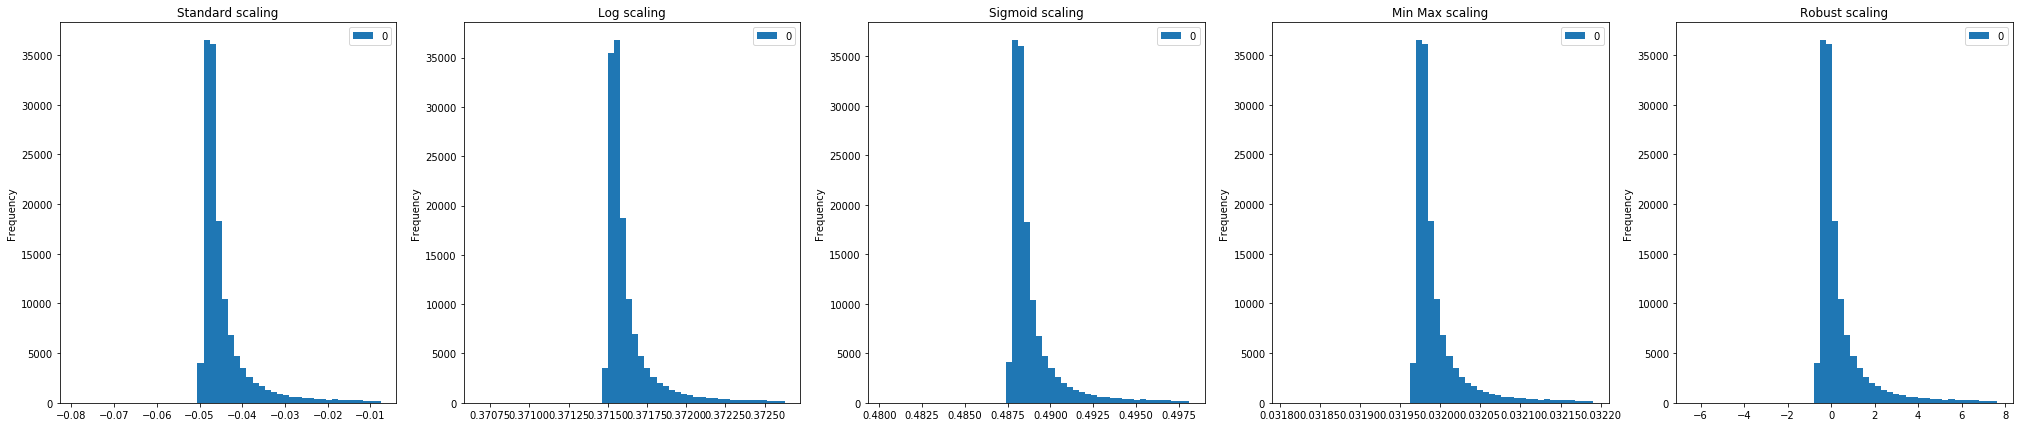

In [187]:
titles = ['Standard scaling','Log scaling','Sigmoid scaling','Min Max scaling','Robust scaling']
scales = [StandardScaler(),LogScaler(),SigmoidScaler(),MinMaxScaler(),RobustScaler()]
fig, ax = plt.subplots(1, len(scales), figsize=(35, 7))

for i in range(len(scales)):
    ax[i].set_title(titles[i])
    plot_hist_varnorm(df[df.fraud == 0],'at/sale',scales[i],ax[i],dev = 15)

### DeepInsight implementation on our data

In [88]:
# X = df[c_cols]
X = df.iloc[:,4:]
y = df['fraud']
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

In [119]:
# expr_file = r"./Dataset/tcga.rnaseq_fpkm_uq.example.txt.gz"
# expr = pd.read_csv(expr_file, sep="\t")
# y = expr['project'].values
# X = expr.iloc[:, 1:].values
# X_train, X_test, y_train, y_test = train_test_split(
#     X, y, test_size=0.2, random_state=23, stratify=y)
# X_train.shape

(480, 5000)

In [120]:
expr

,project,ENSG00000198886,ENSG00000198938,ENSG00000198712,ENSG00000198804,ENSG00000198695,ENSG00000198899,ENSG00000198763,ENSG00000198727,ENSG00000198840,...,ENSG00000162688,ENSG00000156026,ENSG00000104907,ENSG00000141030,ENSG00000172331,ENSG00000121101,ENSG00000106123,ENSG00000127616,ENSG00000108848,ENSG00000156171
0,BRCA,142443345,205445265,147699305,117404552,19543789,128074538,100669015,78626906,94521528,...,382567,95352,304543,308747,226017,5440,18911,343402,424057,351094
1,BRCA,78709354,135482824,121180246,88804234,39039866,71029840,41166438,62038429,80445271,...,160738,120179,179252,441331,226645,4703,49153,441665,319501,347807
2,BRCA,99604197,117501309,145945037,125820545,29398067,111459668,57571894,72484994,47528866,...,348926,143608,132642,287426,166473,19628,6255,410590,551479,266470
3,BRCA,199000111,166111590,196725218,172250215,48695291,104508816,102453636,108779676,116175259,...,91047,257669,206994,350421,325966,45224,18814,337762,306825,362499
4,BRCA,101196052,165092542,101739391,98060933,30626957,101645175,61853651,86458871,65193762,...,176419,90094,130460,415061,176510,16120,28053,241460,269349,277226
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
595,KIRC,429384057,557952528,307117739,502757952,68609327,334100552,323751727,152950552,266226076,...,128004,156390,169990,320089,285306,1245,47882,237383,258116,375739
596,KIRC,94663260,101839315,85030822,73188931,16568512,79634648,68402872,39332719,48389723,...,83447,127849,302607,288090,146811,3333,71334,178832,557809,444036
597,KIRC,137457284,169900976,137942024,193261813,39328062,148074943,97169007,59325438,68483800,...,111254,164311,104990,446266,386035,5236,38955,102192,179076,454518
598,KIRC,187408957,313847864,170834979,270104116,74725096,136260895,136442979,148309109,128124571,...,38680,109563,663210,282228,263113,1920,130941,245678,643782,203113


In [74]:
# pd.DataFrame(X_train).describe()

In [89]:
# Scaling data using logscaler -> scales between 0 and 1.
ln = LogScaler()
X_train_norm = ln.fit_transform(X_train)
X_test_norm = ln.fit_transform(X_test)

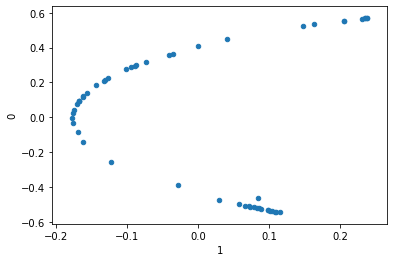

In [183]:
from sklearn.decomposition import PCA, KernelPCA
# kernel PCA
temp_pca = KernelPCA(n_components = 2,kernel = 'rbf')
temp_pca = temp_pca.fit_transform(X_train_norm.T)
temp_pca = pd.DataFrame(temp_pca)
temp_pca.plot(kind = 'scatter',x = 1,y=0)

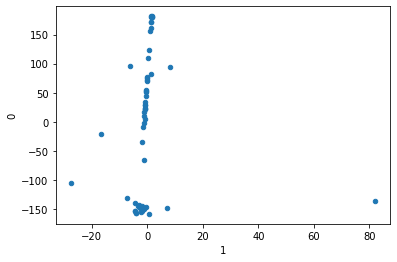

In [184]:
# PCA
temp_pca = PCA(n_components = 2)
temp_pca = temp_pca.fit_transform(X_train_norm.T)
temp_pca = pd.DataFrame(temp_pca)
temp_pca.plot(kind = 'scatter',x = 1,y=0)

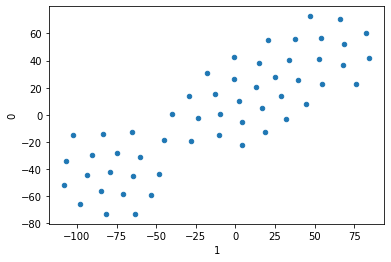

In [185]:
# TSNE
from sklearn.manifold import TSNE
temp_tsne = TSNE().fit_transform(X_train_norm.T)
temp_tsne = pd.DataFrame(temp_tsne)
temp_tsne.plot(kind = 'scatter',x = 1,y=0)

In [111]:
# Intializing an object of image transformer
it = ImageTransformer(feature_extractor='kpca',
                      pixels = X_train.shape[1]//2,
                      random_state=1701, 
                      n_jobs=-1)

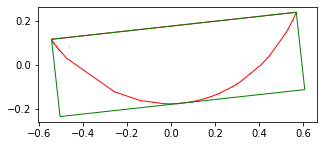

In [112]:
# Fitting data to image transformer
plt.figure(figsize=(5, 5))
train_mat = it.fit(X_train_norm, plot=True)

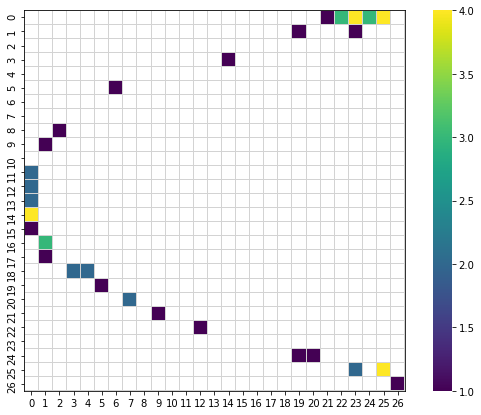

In [113]:
fdm = it.feature_density_matrix()
fdm[fdm == 0] = np.nan
# fdm = fdm * 255
plt.figure(figsize=(10, 7))

ax = sns.heatmap(fdm, cmap="viridis", linewidths=0.01, 
                 linecolor="lightgrey", square=True)
for _, spine in ax.spines.items():
    spine.set_visible(True)

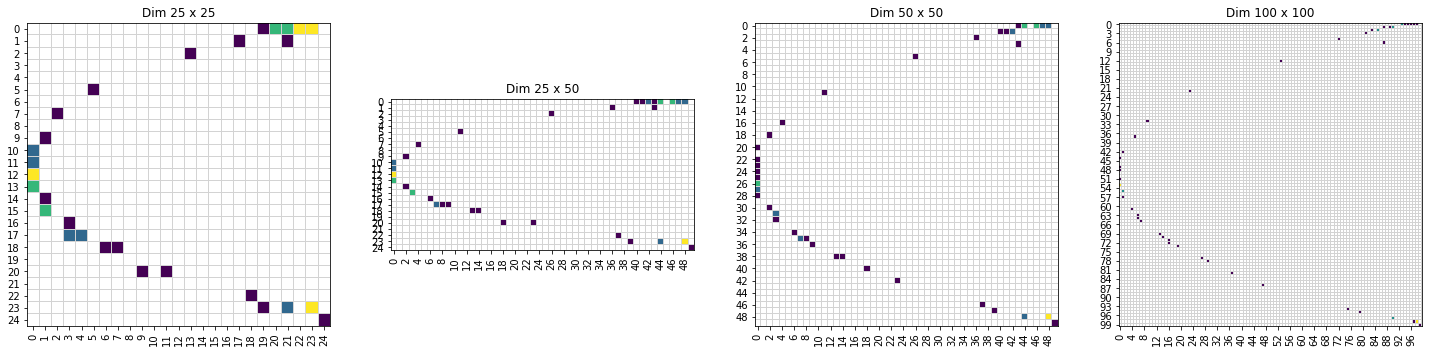

In [43]:
px_sizes = [25, (25, 50), 50, 100]

fig, ax = plt.subplots(1, len(px_sizes), figsize=(25, 7))
for ix, px in enumerate(px_sizes):
    it.pixels = px
    fdm = it.feature_density_matrix()
    fdm[fdm == 0] = np.nan
    cax = sns.heatmap(fdm, cmap="viridis", linewidth=0.01, 
                      linecolor="lightgrey", square=True, 
                      ax=ax[ix], cbar=False)
    cax.set_title('Dim {} x {}'.format(*it.pixels))
    for _, spine in cax.spines.items():
        spine.set_visible(True)

it.pixels = 50

In [51]:
it.pixels = [100,100]
train_mat = it.fit_transform(X_train_norm)
# train_mat = train_mat.transform(X_train_norm)

In [26]:
len(train_mat)

116836

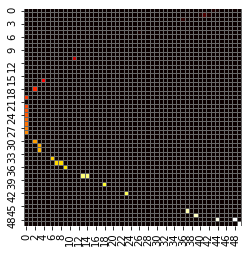

In [15]:
sns.heatmap(train_mat[97], cmap='hot',
                      linewidth=0.01, linecolor='dimgrey',
                      square=True, cbar=False)

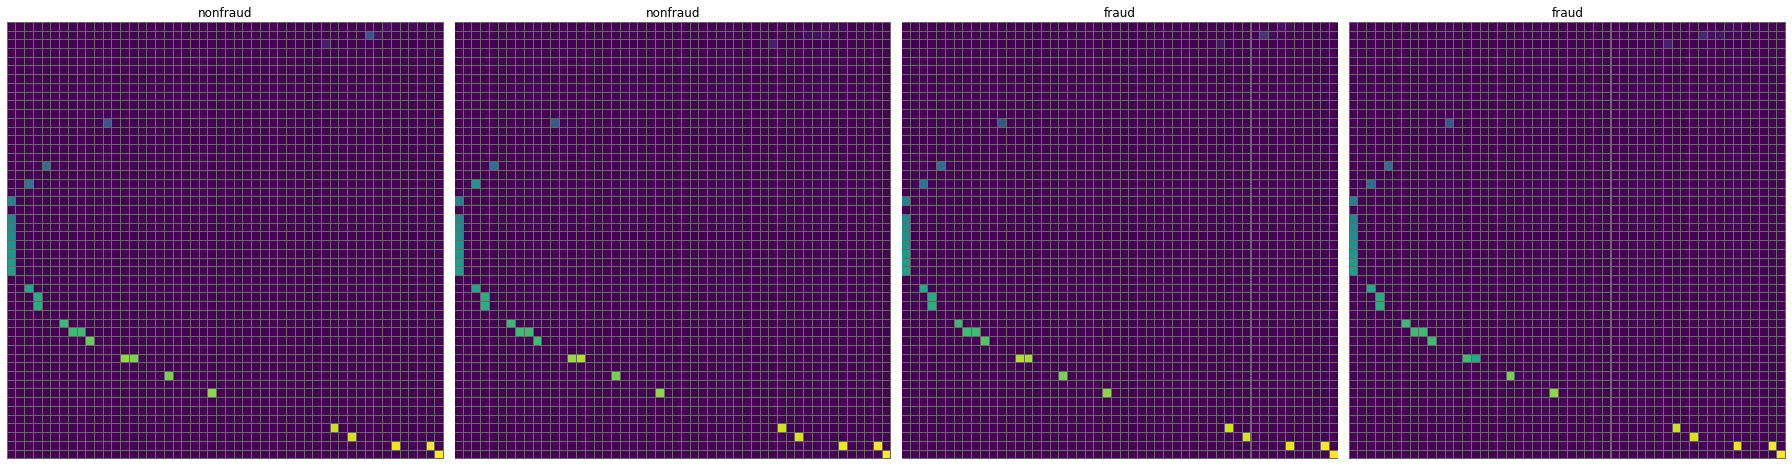

In [39]:
fig, ax = plt.subplots(1, 4, figsize=(25, 7))
titles = ['nonfraud','nonfraud','fraud','fraud']
for j,i in enumerate([0,1,172,397]):
    ax[j].set_title(titles[j])
    cax = sns.heatmap(train_mat[i], cmap="viridis",
                      linewidth=0.01, linecolor='dimgrey',
                      square=True, ax=ax[j], cbar=False)
    cax.axis('off')
plt.tight_layout()

## Equidistant Bar Graphs

In [65]:
def plot_imgs():
    plt.figure(figsize=(20,20))
    for i in range(4):
        img = cv2.imread(nonfraud_imgs[i])
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        img = cv2.resize(img, (500,500))
        plt.subplot(1, 4, i+1)
        plt.title(f'nonfraud {i + 1}')
        plt.axis('off')
        plt.imshow(img)

    plt.show()

    plt.figure(figsize=(20,20))
    for i in range(4):
        img = cv2.imread(fraud_imgs[i])
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        img = cv2.resize(img, (500,500))
        plt.subplot(1, 4, i+1)
        plt.title(f'fraud {i + 1}')
        plt.axis('off')
        plt.imshow(img)

    plt.show()

In [66]:
data_path = '../spglobal_model/Non-image-data-classification-with-CNN/Data/ratios/Alg1_ratios'

In [67]:
import os
nonfraud_imgs = glob.glob(os.path.join(data_path,'0/*.png'))
fraud_imgs = glob.glob(os.path.join(data_path,'1/*.png'))

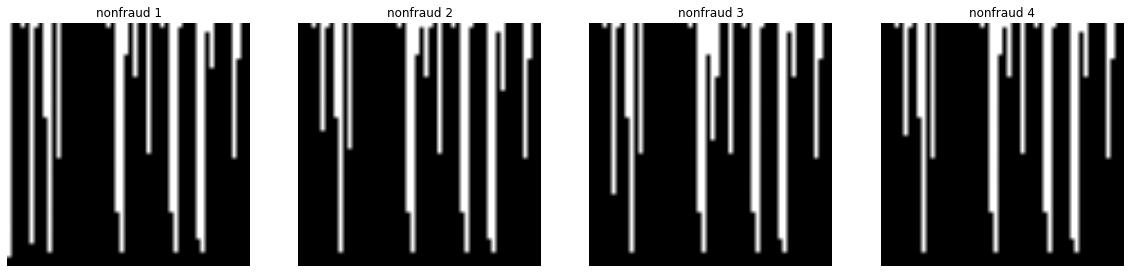

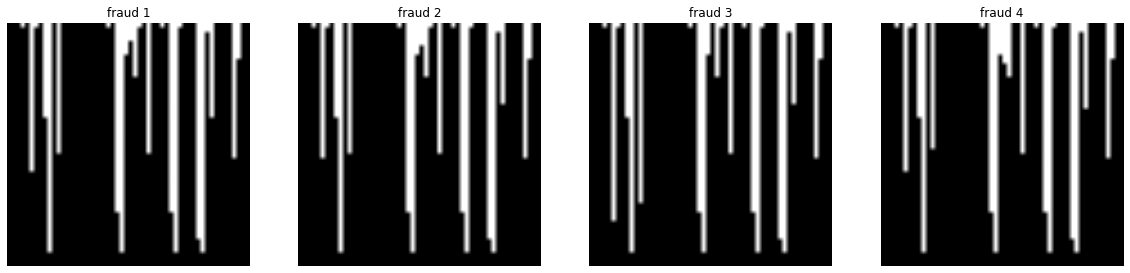

In [68]:
plot_imgs()

## Normalized Distance matrix

In [72]:
data_path = '../spglobal_model/Non-image-data-classification-with-CNN/Data/ratios/Alg2_ratios'

In [73]:
nonfraud_imgs = glob.glob(os.path.join(data_path,'0/*.png'))
fraud_imgs = glob.glob(os.path.join(data_path,'1/*.png'))

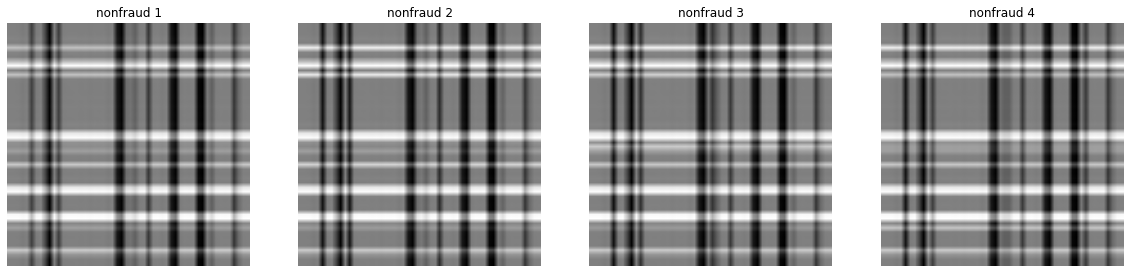

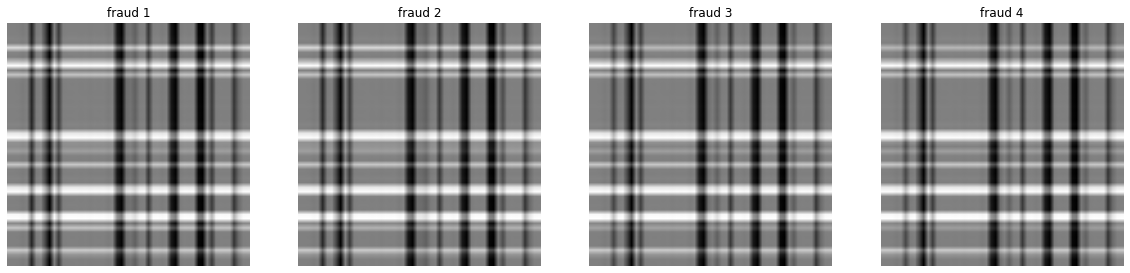

In [74]:
plot_imgs()

## Combined

In [69]:
data_path = '../spglobal_model/Non-image-data-classification-with-CNN/Data/ratios/Alg3_ratios'

In [70]:
nonfraud_imgs = glob.glob(os.path.join(data_path,'0/*.png'))
fraud_imgs = glob.glob(os.path.join(data_path,'1/*.png'))

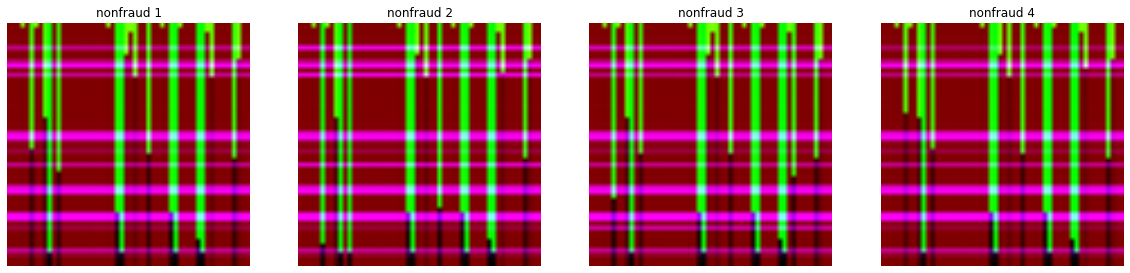

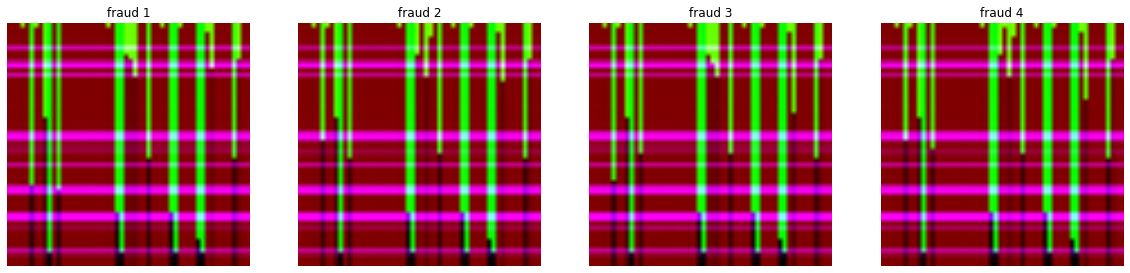

In [71]:
plot_imgs()